TITANIC SURVIVAL PREDICTION


This Jupyter notebook demonstrates how to build and evaluate a machine learning model to predict whether a passenger on the Titanic survived or not. The model is built using a logistic regression algorithm, and its performance is evaluated on a held-out test set.


IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

IMPORTING DATA

In [86]:
df=pd.read_csv(r"C:\Users\ragni\OneDrive\Documents\DATASETS\tested.csv")

GETTING TO KNOW OUR DATA

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.shape

(418, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


HANDLING MISSING VALUES

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

dropping the column 'Cabin' as it has most null values

In [87]:
df.drop(columns='Cabin', axis=1,inplace=True)

substituting null values in 'Age' and 'Fare' with the mean values of the respective columns

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

checking the null values after handling

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


DATA VISUALIZATION

In [88]:
sns.set()

In [89]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

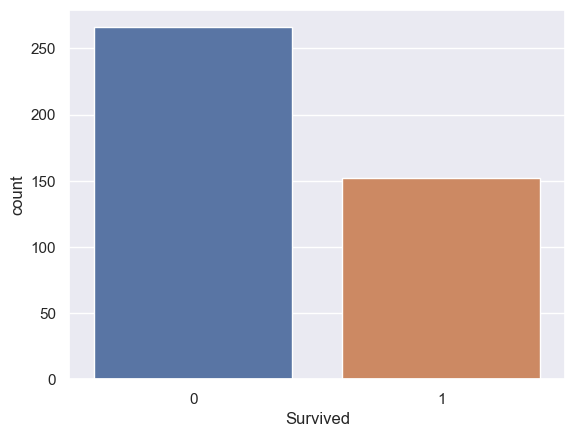

In [90]:
sns.countplot(x='Survived',data=df)

In [19]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

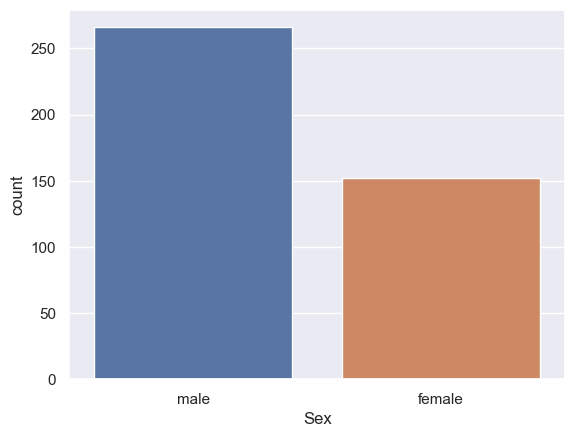

In [91]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

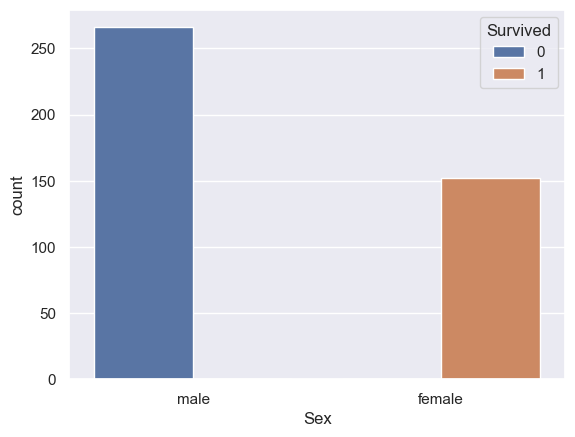

In [92]:
sns.countplot(x='Sex',hue='Survived',data=df)

this visualization shows that all of the surviving passengers were females!

In [ ]:
df['Survived'].value_counts()

In [22]:
df[['Survived','Sex']]

,Survived,Sex
0,0,male
1,1,female
2,0,male
3,0,male
4,1,female
...,...,...
413,0,male
414,1,female
415,0,male
416,0,male


<Axes: xlabel='Pclass', ylabel='count'>

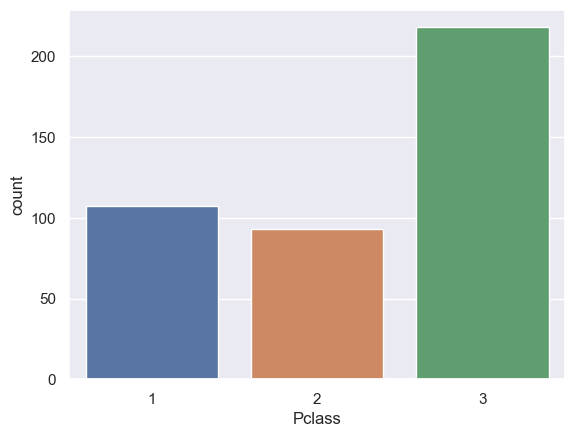

In [93]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

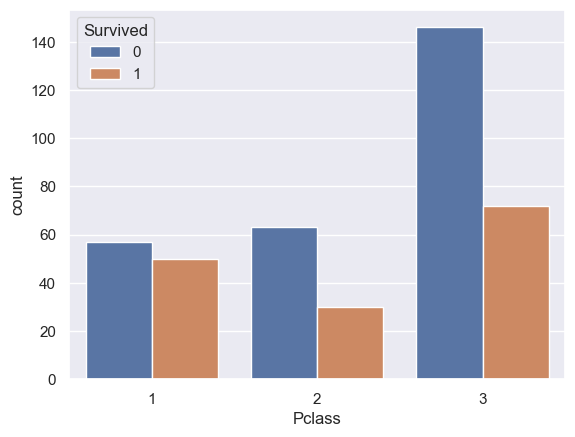

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [25]:
df[['Survived','Pclass']]

,Survived,Pclass
0,0,3
1,1,3
2,0,2
3,0,3
4,1,3
...,...,...
413,0,3
414,1,1
415,0,3
416,0,3


In [26]:
df[['Survived','Sex','Pclass']]

,Survived,Sex,Pclass
0,0,male,3
1,1,female,3
2,0,male,2
3,0,male,3
4,1,female,3
...,...,...,...
413,0,male,3
414,1,female,1
415,0,male,3
416,0,male,3


In [28]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

CONVERTING CATEGORICAL DATA INTO NUMERIC DATA

In [29]:
df.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


DROPPING NON SIGNIFICANT FEATURES

In [31]:
df.drop(columns=['PassengerId','Name','Ticket'], axis=1,inplace=True)


In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


SEPARATING THE FEATURE AND THE TARGET

In [33]:
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [34]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [35]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


SPLITTING THE DATA INTO TRAINING AND TESTING DATA SET

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [37]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


MODEL TRAININGS

MODEL 1: Logistic Regression Model

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train, y_train)

LogisticRegression()

model evaluation: accuracy | precision | recall 

In [41]:
x_test_prediction=model.predict(x_test)

In [42]:
print(x_test_prediction)

[0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 0]


In [43]:
t_data_acc=accuracy_score(x_test_prediction,y_test)

In [44]:
print("Accuracy Score: ", t_data_acc)

Accuracy Score:  1.0


In [45]:
from sklearn.metrics import precision_score

t_data_precision=precision_score(y_test,x_test_prediction)

In [46]:
print("precision: ", t_data_precision)

precision:  1.0


In [47]:
x_train_prediction=model.predict(x_train)
from sklearn.metrics import recall_score

test_data_recall = recall_score(y_train, x_train_prediction)


In [48]:
print('test data recall:',test_data_recall)

test data recall: 1.0


In [49]:
from sklearn import metrics

score = model.score(x_test, y_test)
print(score)

1.0


In [50]:
cm = metrics.confusion_matrix(y_train, x_train_prediction)
print(cm)

[[213   0]
 [  0 121]]


Text(0.5, 1.0, "('Accuracy Score :', 1.0)")

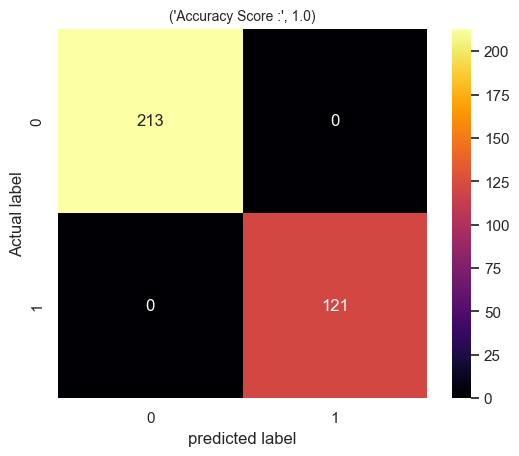

In [51]:
sns.heatmap(cm, annot=True, fmt="d", square=True, cmap="inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :', score)
plt.title(title, size=10)

In [53]:
from sklearn.metrics import classification_report

classification_report(x_test_prediction, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        53\n           1       1.00      1.00      1.00        31\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

it has a precision, recall, and F1 score of 1.0 for both classes. This means that the model is correctly identifying all of the positive and negative examples in the dataset. This is a very good result, as it means that the model is not missing any important data points and is not predicting any false positives or false negatives.

The accuracy of the model is also 1.0, which means that it is correctly predicting all of the examples in the dataset. This is also a very good result.

Overall, the output of this linear regression model shows that it is performing very well on the dataset. It is correctly identifying all of the positive and negative examples, and it is not making any mistakes.

MODEL 2: Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_2 = RandomForestClassifier(n_estimators=100)


In [57]:
model_2.fit(x_train,y_train)


RandomForestClassifier()

model evaluation: accuracy | precision | recall 

In [58]:
x_test_pred = model_2.predict(x_test)


In [59]:
model_2.score(x_train, y_train)
acc_score = round(model_2.score(x_test, y_test) * 100, 2)
model_2_acc = accuracy_score(x_test_pred, y_test)


In [60]:
model_2_acc


1.0

In [61]:
acc_score


100.0

In [63]:
precision = precision_score(x_test_pred, y_test)
print(precision)


1.0


In [64]:
recall = recall_score(x_test_pred, y_test)
print(recall)

1.0


In [65]:
classification_report(x_test_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        53\n           1       1.00      1.00      1.00        31\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

 it has a precision, recall, and F1 score of 1.0 for both classes. This means that the model is correctly identifying all of the positive and negative examples in the dataset. This is a very good result, as it means that the model is not missing any important data points and is not predicting any false positives or false negatives.
 The accuracy of the model is also 1.0, which means that it is correctly predicting all of the examples in the dataset. This is also a very good result.
This is a better result than the logistic regression model, which had an accuracy of 84%. The random forest model is able to achieve a higher accuracy because it is able to learn more complex relationships between the features and the target variable.

MODEL 3: KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier


In [67]:
model_3 = KNeighborsClassifier(n_neighbors=3)


In [69]:
model_3.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Model evaluation: accuracy | precision | recall

In [70]:
x_test_pred = model_3.predict(x_test)

In [71]:
model_3_acc = accuracy_score(x_test_pred, y_test, normalize=True)

In [72]:
model_3_score = round(model_3.score(x_train, y_train) * 100, 2)


In [73]:
model_3_precision = precision_score(x_test_pred, y_test)
model_3_recall = recall_score(x_test_pred, y_test)

In [74]:
model_3_score

85.33

In [75]:
model_3_acc


0.6904761904761905

In [76]:
print(model_3_precision)


0.41935483870967744


In [77]:
print(model_3_recall)

0.6190476190476191


In [79]:
classification_report(x_test_pred, y_test)


'              precision    recall  f1-score   support\n\n           0       0.85      0.71      0.78        63\n           1       0.42      0.62      0.50        21\n\n    accuracy                           0.69        84\n   macro avg       0.63      0.67      0.64        84\nweighted avg       0.74      0.69      0.71        84\n'

 it has a precision, recall, and F1 score of 0.85, 0.71, and 0.78 for the negative class, and 0.42, 0.62, and 0.50 for the positive class. This means that the model is correctly identifying 85% of the negative examples and 62% of the positive examples in the dataset. However, it is also predicting 15% of the negative examples as positive and 38% of the positive examples as negative.

The accuracy of the model is 0.69, which means that it is correctly predicting 69% of the examples in the dataset. This is a lower accuracy than the logistic regression and random forest models.

In [80]:
print(x) 
print(y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


PREDICTING VALUES

In [81]:
p1 = model.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p2 = model_2.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])
p3 = model_3.predict([[3, 0, 34.5, 0, 0, 7.8292, 2]])

C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [82]:
print(p1)
print(p2)
print(p3)

[0]
[0]
[0]


In [94]:
p1 = model.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])
p2 = model_2.predict([[2, 1, 38.5, 0, 0, 7.2500, 0]])
p3 = model_3.predict([[2, 0, 38.5, 0, 0, 7.2500, 0]])

C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ragni\PycharmProjects\PersonalProjects\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [95]:
print(p1)
print(p2)
print(p3)

[0]
[1]
[0]
